<a href="https://colab.research.google.com/github/Md-Aziz-Developer/tensorflow-learning/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable bases on some other combination of variables, even shorter... predictiing a number.


In [2]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.17.1


## Creating data to view and fit

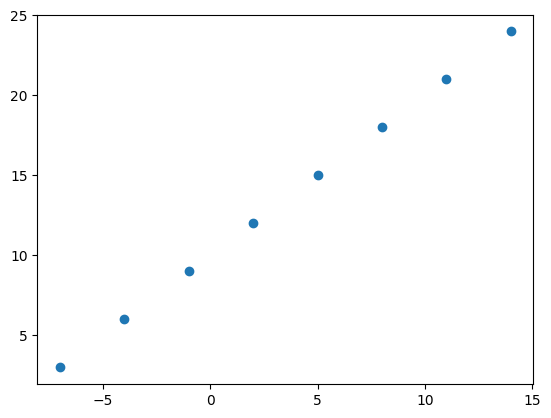

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X=np.array([-7.0, -4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X,y);

In [4]:
y==X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shape

In [5]:
# Create a demo tensor for our housing price prediction problem
housing_info=tf.constant(['bedroom','bathroom','garage'])
housing_price=tf.constant([939700])
housing_info, housing_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0],y[0]

(-7.0, 3.0)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
input_shape=X.shape
output_shape=y.shape
input_shape, output_shape

((8,), (8,))

In [9]:
X[0].shape, y[0].shape

((), ())

In [10]:
X[0].ndim

0

In [11]:
X[0], y[0]

(-7.0, 3.0)

In [12]:
# Turn our NUmPy arrays into tensors
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

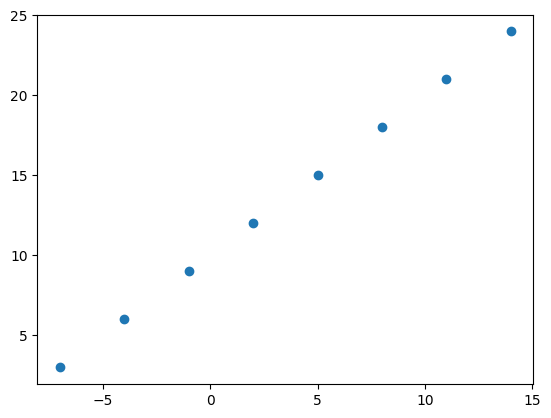

In [14]:
plt.scatter(X,y)

## Steps in modeling with tensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in pther words, the function which tells our model how erong it is) and the optimizer (tell our model how to improve the patterns its learning) an evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [15]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short form of stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1), y, epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step - loss: 21.0303 - mae: 21.0303
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 20.6372 - mae: 20.6372
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 20.3017 - mae: 20.3017
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 20.0205 - mae: 20.0205
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 19.7392 - mae: 19.7392
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 19.4580 - mae: 19.4580
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 19.1767 - mae: 19.1767
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 18.8955 - mae: 18.8955
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 18.6142 - mae: 18.6142
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 18.3330 - mae: 18.3330
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 18.0517 - mae: 18.0517
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 17.7705 - mae: 17.7705
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━

In [16]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Try and make a prediction using our model
y_preds=model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [18]:
y_preds

array([[-8.267534]], dtype=float32)

## Improving the model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of  the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it traning for longer) or on more data (give the model example to learn from).

In [19]:
# Let's rebuild our model

# 1. Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - loss: 12.5026 - mae: 12.5026
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 12.3701 - mae: 12.3701
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.2376 - mae: 12.2376
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 12.1051 - mae: 12.1051
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.9726 - mae: 11.9726
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 11.8401 - mae: 11.8401
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.7076 - mae: 11.7076
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.5751 - mae: 11.5751
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.4426 - mae: 11.4426
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.3101 - mae: 11.3101
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.1776 - mae: 11.1776
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 11.0451 - mae: 11.0451
Epoch 13/100
1/1 ━━━━━━━

In [20]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
# Let's see if our model's prediction has improved
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[30.092089]], dtype=float32)

In [22]:
# Let's rebuild our model again (this time we added an extra hidden layer with 100 hidden units)

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step - loss: 13.7160 - mae: 13.7160
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 13.2439 - mae: 13.2439
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 12.7857 - mae: 12.7857
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 12.3279 - mae: 12.3279
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 11.8639 - mae: 11.8639
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.3962 - mae: 11.3962
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 10.9725 - mae: 10.9725
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.5312 - mae: 10.5312
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.0702 - mae: 10.0702
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.5884 - mae: 9.5884
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.0764 - mae: 9.0764
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.5293 - mae: 8.5293
Epoch 13/100
1/1 ━━━━━━━━━━━━━

In [23]:
# Let's see if our model's prediction has improved after adding hidden layer
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[31.15833]], dtype=float32)

In [24]:
# Let's rebuild our model again

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None), # Decrease the hidden layer unit to 50 and activation to default
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step - loss: 12.1551 - mae: 12.1551
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.5738 - mae: 11.5738
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 10.9839 - mae: 10.9839
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.3823 - mae: 10.3823
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.7659 - mae: 9.7659
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.1315 - mae: 9.1315
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.4759 - mae: 8.4759
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.7958 - mae: 7.7958
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.2611 - mae: 7.2611
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.2373 - mae: 7.2373
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.2135 - mae: 7.2135
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.1897 - mae: 7.1897
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [25]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[31.739126]], dtype=float32)

In [26]:
# Let's rebuild our model again

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(), # change the optimizer to Adam
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step - loss: 12.2270 - mae: 12.2270
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.1563 - mae: 12.1563
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.0855 - mae: 12.0855
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.0147 - mae: 12.0147
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.9439 - mae: 11.9439
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.8731 - mae: 11.8731
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.8023 - mae: 11.8023
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11.7314 - mae: 11.7314
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.6605 - mae: 11.6605
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.5896 - mae: 11.5896
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.5186 - mae: 11.5186
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.4476 - mae: 11.4476
Epoch 13/100
1/1 ━━━━━━━

In [27]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[31.386972]], dtype=float32)

In [28]:
# Let's rebuild our model again

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # Add learning rate to 0.01
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.7209 - mae: 13.7209
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 13.0370 - mae: 13.0370
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 12.3588 - mae: 12.3588
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 11.6851 - mae: 11.6851
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.0140 - mae: 11.0140
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.3434 - mae: 10.3434
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 9.6708 - mae: 9.6708
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 8.9935 - mae: 8.9935
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 8.3086 - mae: 8.3086
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 7.6127 - mae: 7.6127
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6.9023 - mae: 6.9023
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 6.7202 - mae: 6.7202
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [29]:
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[26.849802]], dtype=float32)

In [30]:
model.predict(np.array([21.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[30.79666]], dtype=float32)

## Evaluating a model

In Practice, a typical workflow you'll go through when building neural networks is :

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

when it comes to evaluation... there a re 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:

* The data-what data are we working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth(the original labels)?

In [31]:
# Make a bigger dataset
X= tf.range(-100, 100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [32]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

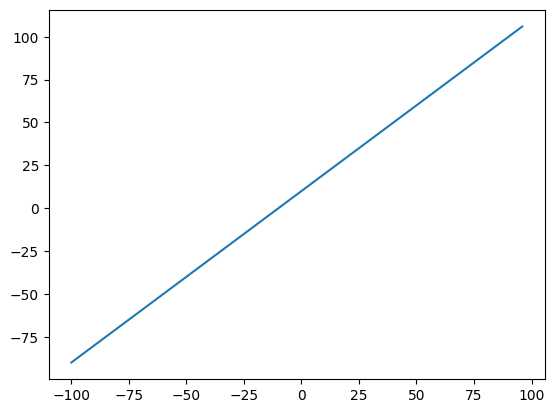

In [33]:
# Visualize the data
plt.plot(X,y)

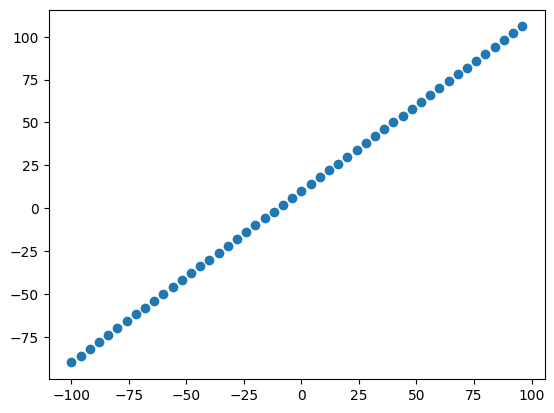

In [34]:
plt.scatter(X,y)

### The 3 sets...

* **Traning set** - the model learns from this data, whihc is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is model has learned, this set is typically 10-15% of the total data available.

In [35]:
# Check the length of how many samples we have
len(X)

50

In [36]:
# Split the data into train and test sets
X_train=X[:40] # first 40 are training samples (80% of the data)
y_train=y[:40]

X_test=X[40:] # last 10 are testing samples (20% of the data)
y_test=y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualize the data
Now we've got our data in training and test sets.. let's visualize it again!

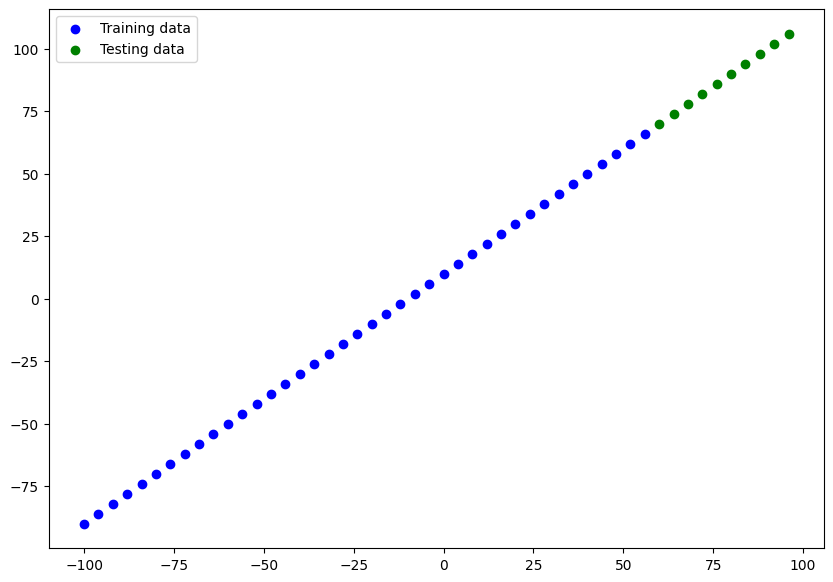

In [37]:
plt.figure(figsize=(10,7))
# Plot traning data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data ub green
plt.scatter(X_test, y_test,c="g", label="Testing data")
# Show a legend
plt.legend();

In [38]:
# Let's have a look how to build a neural network for our data

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100)

In [39]:
# Visualizing the model
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Let's create a model which builds automatically by defining the input_shape arguments
tf.random.set_seed(42)

# 1. Create a model (same as above)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1),y, epochs=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't update during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

**Resources:** For more in-depth overview of the trainable parameters within the layer, check out MIT's introduction to deep learning video. https://www.youtube.com/watch?v=ErnWZxJovaM&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=2

**Exercise:** Try playing with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [42]:
# Let's fit our model to the traning data
model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100,verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.7860 - mae: 9.7860 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.0652 - mae: 8.0652 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.7744 - mae: 9.7744 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.0474 - mae: 8.0474 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.7628 - mae: 9.7628 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0295 - mae: 8.0295 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.7511 - mae: 9.7511 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.0117 - mae: 8.0117 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.7395 - mae: 9.7395 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.1198 - mae: 8.1198 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.6638 - mae: 8.6638
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.5306 - mae: 8.5306 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/ste

In [43]:
# Get a summary of our model
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

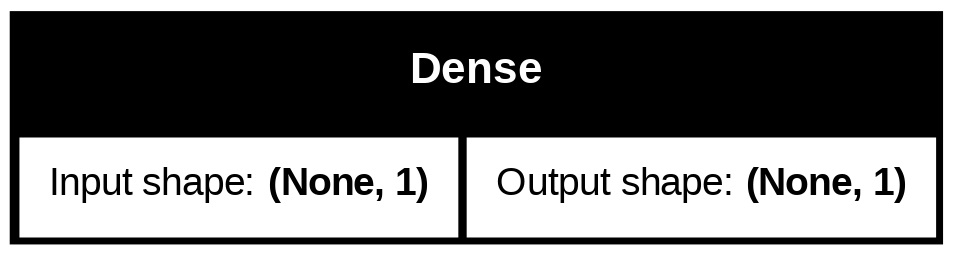

In [44]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

In [45]:
# Let's create a model which builds automatically by defining the input_shape arguments
tf.random.set_seed(42)

# 1. Create a model (same as above)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [46]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Fit the model
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 40.7435 - mae: 40.7435 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 31.1129 - mae: 31.1129 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27.4024 - mae: 27.4024 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.3742 - mae: 16.3742 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.2979 - mae: 19.2979 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.0889 - mae: 13.0889 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.9548 - mae: 14.9548 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.5606 - mae: 15.5606 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.2825 - mae: 11.2825 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.1296 - mae: 15.1296
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.1145 - mae: 11.1145 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.9606 - mae: 14.9606 
Epoch 13/100
2/2 ━━━━━━━

In [48]:
# Get a summary of our model
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

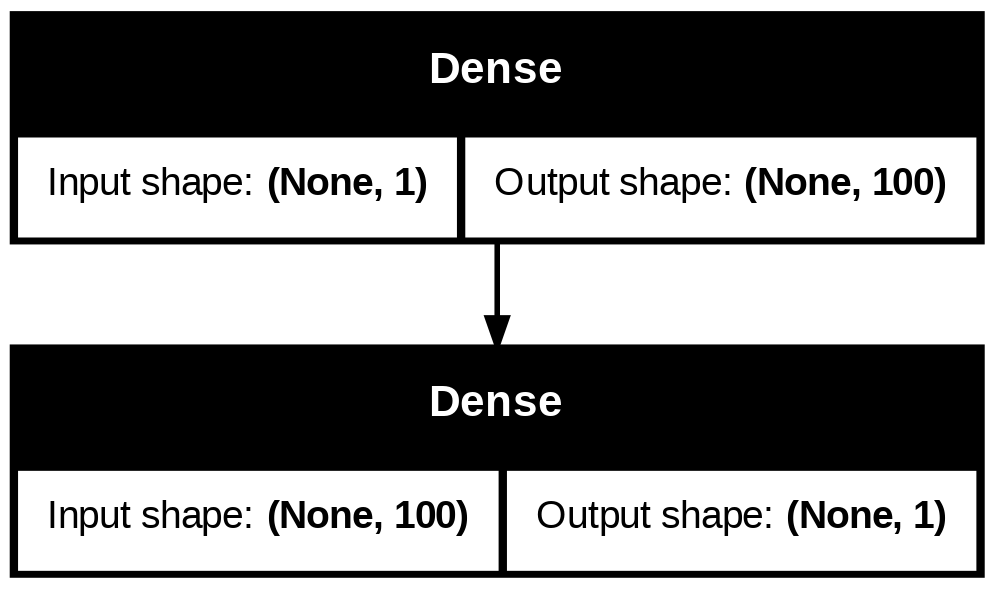

In [49]:
plot_model(model=model,show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the groud truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model predictions).

In [50]:
# Make some predictions
y_pred=model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[39.552437],
       [42.080948],
       [44.609463],
       [47.13798 ],
       [49.6665  ],
       [52.195015],
       [54.72353 ],
       [57.252052],
       [59.780567],
       [62.30908 ]], dtype=float32)

In [51]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to reuse some kind of funtinality in the future, it's a good idea to turn it into a function.

In [52]:
# Let's create plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots traning data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  # Plot testing data in green
  plt.scatter(test_data,test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data,predictions, c="r",label="Predictions")
  # Show the legend
  plt.legend();

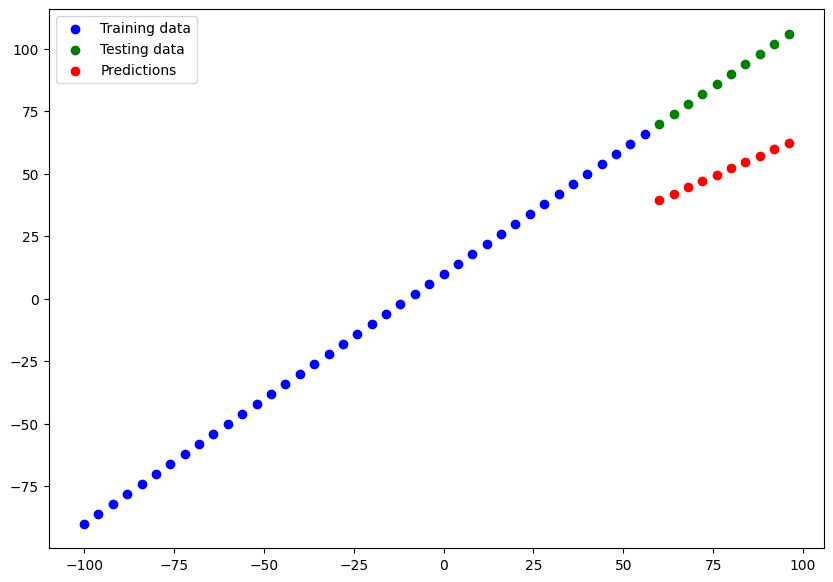

In [53]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

In [54]:
# Let's refine our model by tunning the hyperparameters

# Create another model
new_model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# Compile the model
new_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=(0.01)),
                  metrics=["mae"]
                  )


In [55]:
# Get the model summary
new_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# Fit the model
new_model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 66.8578 - mae: 66.8578  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44.1824 - mae: 44.1824 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.5498 - mae: 22.5498 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.2483 - mae: 9.2483 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.6115 - mae: 15.6115 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.1247 - mae: 18.1247 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.3957 - mae: 15.3957 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.2141 - mae: 11.2141 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.3959 - mae: 7.3959 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.5382 - mae: 10.5382 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.9418 - mae: 10.9418 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3056 - mae: 8.3056 
Epoch 13/100
2/2 ━━━━━━━━━━━━━

In [57]:
# Get the predictions of our model
y_pred=new_model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[ 70.625244],
       [ 74.66581 ],
       [ 78.706375],
       [ 82.746925],
       [ 86.7875  ],
       [ 90.82806 ],
       [ 94.86863 ],
       [ 98.90919 ],
       [102.949745],
       [106.9903  ]], dtype=float32)

In [58]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

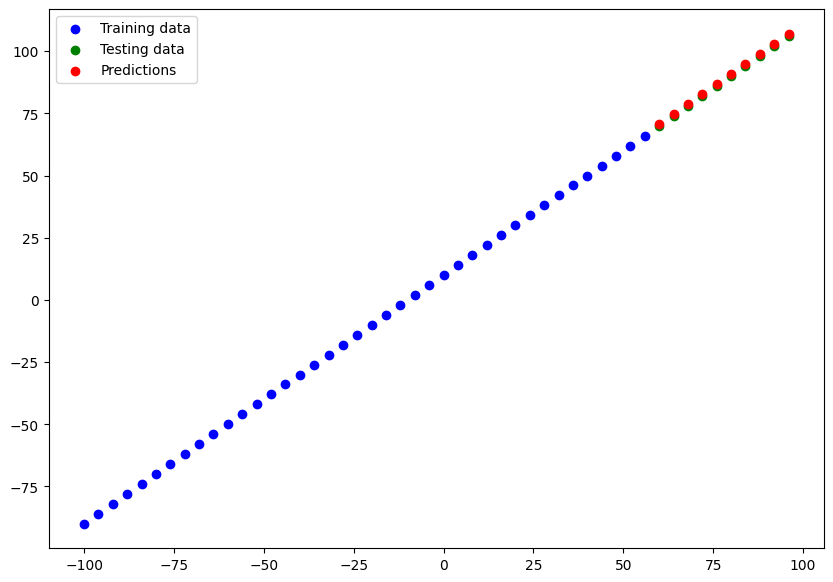

In [59]:
# Visualize the predictions again
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

In [60]:
## Almost predictions match with our true value let's tune more by adding more hidden layer and change learning rate by 0.02 and epochs to 150

# Create another model
new_model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1]),
    tf.keras.layers.Dense(100), # Added extra 100 unit hidden layer
    tf.keras.layers.Dense(1)
])

# Compile the model
new_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=(0.02)),
                  metrics=["mae"]
                  )

In [61]:
new_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,401 (40.63 KB)

 Trainable params: 10,401 (40.63 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
new_model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=150, verbose=1)

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 45.2259 - mae: 45.2259
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 83.9124 - mae: 83.9124 
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.1477 - mae: 39.1477 
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 44.4175 - mae: 44.4175 
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.0528 - mae: 15.0528 
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.2233 - mae: 19.2233 
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.2752 - mae: 10.2752 
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.7601 - mae: 17.7601 
Epoch 9/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.6344 - mae: 12.6344 
Epoch 10/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.3918 - mae: 11.3918 
Epoch 11/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.8722 - mae: 9.8722   
Epoch 12/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.1490 - mae: 12.1490 
Epoch 13/150
2/2 ━━━━━━━━━

In [63]:
y_pred=new_model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[ 68.595245],
       [ 72.51479 ],
       [ 76.43434 ],
       [ 80.35391 ],
       [ 84.27347 ],
       [ 88.19302 ],
       [ 92.11258 ],
       [ 96.03214 ],
       [ 99.95169 ],
       [103.87125 ]], dtype=float32)

In [64]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

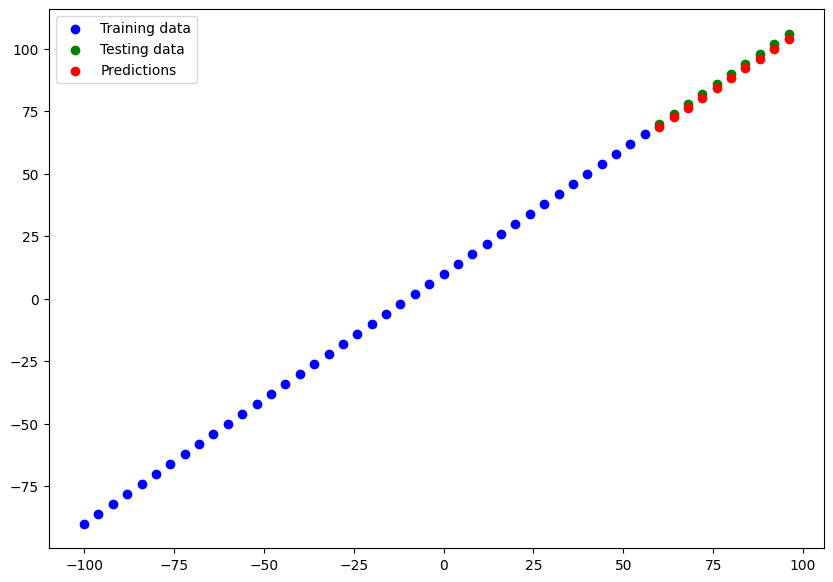

In [65]:
# Visualize the predictions again
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

In [66]:
## After more tunning the prediction not improving instead of it get worse then previous one so let's stick on previous one

# Create another model
new_model2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# Compile the model
new_model2.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=(0.01)),
                  metrics=["mae"]
                  )

# Fit the model
new_model2.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 38.7009 - mae: 38.7009  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.8982 - mae: 17.8982 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.4176 - mae: 11.4176 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.4462 - mae: 17.4462 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.6048 - mae: 16.6048 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.0819 - mae: 12.0819 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.8349 - mae: 7.8349 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.5409 - mae: 10.5409 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.0844 - mae: 11.0844 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.1505 - mae: 8.1505
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.5036 - mae: 7.5036 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.5260 - mae: 8.5260
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

In [67]:
y_pred=new_model2.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[ 69.537125],
       [ 73.508415],
       [ 77.47972 ],
       [ 81.45102 ],
       [ 85.4223  ],
       [ 89.3936  ],
       [ 93.36489 ],
       [ 97.336174],
       [101.30748 ],
       [105.27877 ]], dtype=float32)

In [68]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

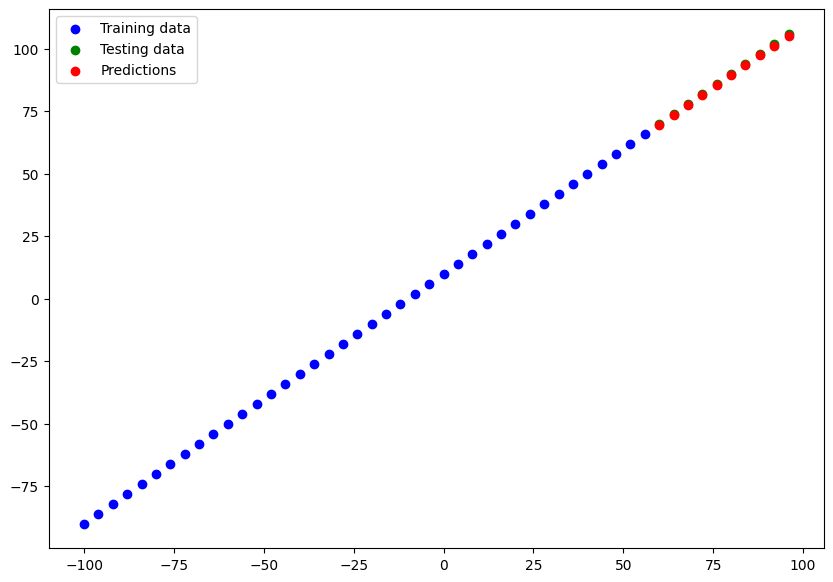

In [69]:
# Visualize the predictions again
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be diffreenr evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [70]:
# Evaluate the model on the test set
new_model2.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 0.5921 - mae: 0.5921


[0.5920501947402954, 0.5920501947402954]

In [71]:
y_pred

array([[ 69.537125],
       [ 73.508415],
       [ 77.47972 ],
       [ 81.45102 ],
       [ 85.4223  ],
       [ 89.3936  ],
       [ 93.36489 ],
       [ 97.336174],
       [101.30748 ],
       [105.27877 ]], dtype=float32)

In [72]:
# Calculate the mean absolute error
mae=tf.metrics.mae(y_true=y_test,y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.46287537, 0.49158478, 0.52027893, 0.5489807 , 0.57769775,
       0.60639954, 0.63510895, 0.663826  , 0.69252014, 0.72122955],
      dtype=float32)>

In [73]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.537125],
       [ 73.508415],
       [ 77.47972 ],
       [ 81.45102 ],
       [ 85.4223  ],
       [ 89.3936  ],
       [ 93.36489 ],
       [ 97.336174],
       [101.30748 ],
       [105.27877 ]], dtype=float32)>

In [74]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [75]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.537125,  73.508415,  77.47972 ,  81.45102 ,  85.4223  ,
        89.3936  ,  93.36489 ,  97.336174, 101.30748 , 105.27877 ],
      dtype=float32)>

In [76]:
# Calculate the mean absolute error
mae=tf.metrics.mae(y_true=y_test,y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.5920502>

In [77]:
# Calculate the mean square error
mse=tf.metrics.mse(y_true=y_test,y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.3573219>

In [78]:
# Make some function to reuse MAE and MSE
def mae(y_true,y_pred):
  return tf.metrics.mae(y_true=y_true,y_pred=tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.metrics.mse(y_true=y_true,y_pred=tf.squeeze(y_pred))


### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give you model more of a chance to find patterns in the data.

Let's do 3 modeling experiments:
1. `model_1` - same as the original model 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [79]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [80]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"]
                )

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 22.1212 - mae: 22.1212 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.9168 - mae: 8.9168 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.8494 - mae: 7.8494  
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.8387 - mae: 10.8387  
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.6489 - mae: 7.6489 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.0129 - mae: 12.0129 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.1738 - mae: 8.1738
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.8283 - mae: 8.8283 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.7771 - mae: 7.7771 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.7461 - mae: 10.7461
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.5823 - mae: 7.5823
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.9201 - mae: 11.9201
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


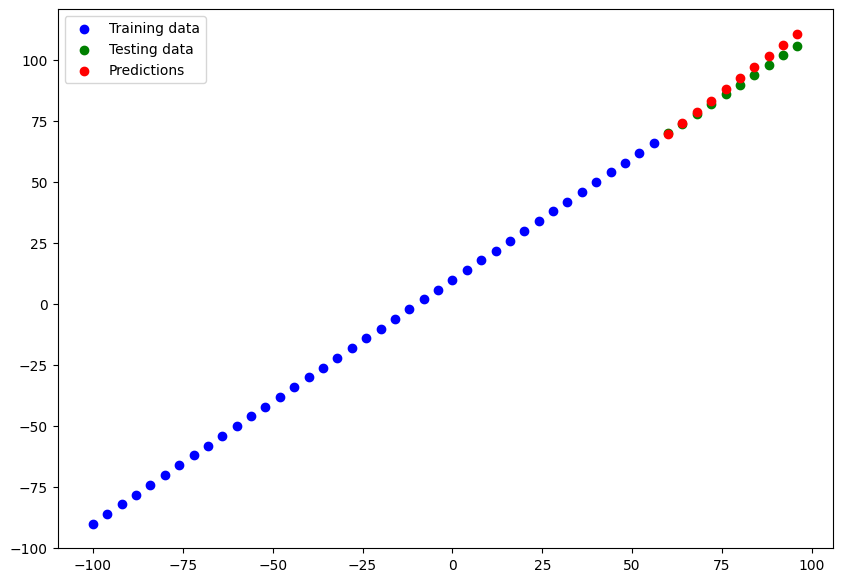

In [81]:
# Make and plot prediction for model_1
y_preds_1=model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [82]:
# Calculate model_1 evaluation mmetrics
mae_1=mae(y_test,y_preds_1)
mse_1=mse(y_test,y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=2.3648026>,
 <tf.Tensor: shape=(), dtype=float32, numpy=7.9941673>)

**Build `model_2`**
* 2 dense layers trained for 100 epochs

In [83]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit the model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 44.6756 - mae: 44.6756 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33.6061 - mae: 33.6061 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.3628 - mae: 23.3628
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 23.3238 - mae: 23.3238 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.4329 - mae: 15.4329 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.8895 - mae: 18.8895 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.6439 - mae: 13.6439
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.9103 - mae: 14.9103 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.7255 - mae: 15.7255 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.7942 - mae: 11.7942 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.7670 - mae: 14.7670 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.8725 - mae: 10.8725
Epoch 13/100
2/2 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


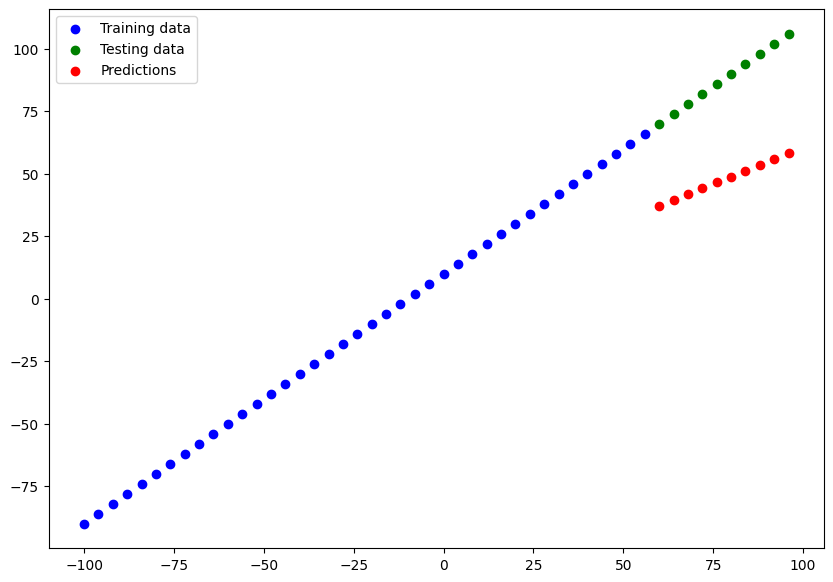

In [84]:
# Make and plot predictions for model_2
y_preds_2=model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [85]:
# Calculate model_2 evaluation mmetrics
mae_2=mae(y_test,y_preds_2)
mse_2=mse(y_test,y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=40.27423>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1644.0199>)

**Build `model_3`**

* 2 layers, trained for 500 epocs

In [87]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X,axis=-1),y,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 39.2062 - mae: 39.2062 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31.9096 - mae: 31.9096 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 28.3740 - mae: 28.3740 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22.1292 - mae: 22.1292 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.1315 - mae: 24.1315 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.1255 - mae: 23.1255 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.6339 - mae: 24.6339 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.8362 - mae: 9.8362 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.2772 - mae: 16.2772 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.1844 - mae: 23.1844 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.6861 - mae: 22.6861 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24.3246 - mae: 24.3246 
Epoch 13/500
2/2 ━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


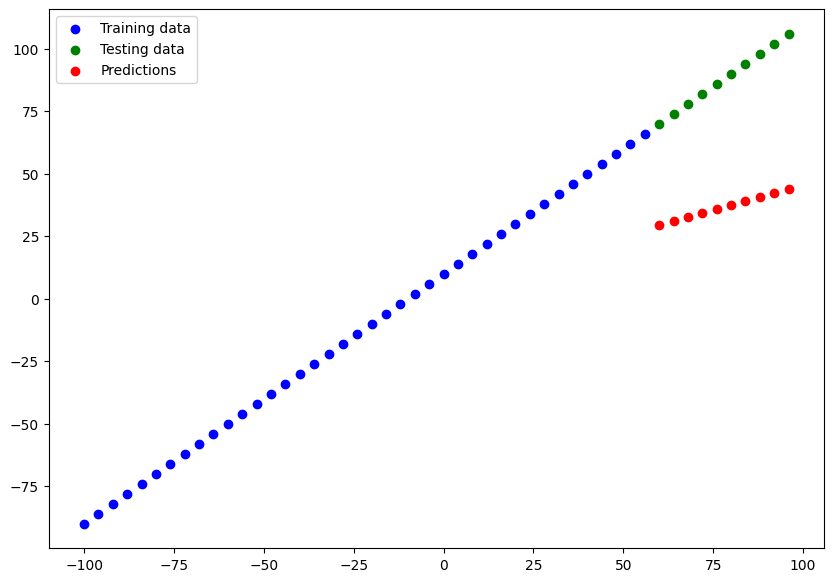

In [88]:
# Make and plot some predictions
y_preds_3=model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [89]:
# Calculate model_3 evaulation metrics
mae_3=mae(y_test,y_preds_3)
mse_3=mse(y_test,y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=51.256214>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2675.1516>)